In [2548]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2549]:
import glob 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import math
import scipy 
import matplotlib.style
import matplotlib as mpl
import networkx as nx
import sys
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [3232]:
x_in = 'barktreeMini/*.in'
x_out = 'barktreeMini/*.ans'
all_in_data = glob.glob(x_in)
all_ans_data = glob.glob(x_out)

In [3233]:
print(all_in_data)
print()
print(all_ans_data)

['barktreeMini\\barktree.00.in', 'barktreeMini\\barktree.01.in', 'barktreeMini\\barktree.02.in', 'barktreeMini\\barktree.03.in', 'barktreeMini\\barktree.04.in', 'barktreeMini\\barktree.05.in', 'barktreeMini\\barktree.06.in', 'barktreeMini\\barktree.07.in', 'barktreeMini\\barktree.08.in', 'barktreeMini\\barktree.09.in', 'barktreeMini\\barktree.10.in', 'barktreeMini\\barktree.11.in', 'barktreeMini\\barktree.12.in', 'barktreeMini\\barktree.13.in', 'barktreeMini\\barktree.14.in', 'barktreeMini\\barktree.15.in', 'barktreeMini\\barktree.16.in', 'barktreeMini\\barktree.17.in', 'barktreeMini\\barktree.18.in', 'barktreeMini\\barktree.19.in', 'barktreeMini\\barktree.20.in', 'barktreeMini\\barktree.21.in', 'barktreeMini\\barktree.22.in', 'barktreeMini\\barktree.23.in', 'barktreeMini\\barktree.24.in', 'barktreeMini\\barktree.25.in', 'barktreeMini\\barktree.26.in', 'barktreeMini\\barktree.27.in', 'barktreeMini\\barktree.28.in', 'barktreeMini\\barktree.29.in', 'barktreeMini\\barktree.30.in', 'barktr

In [3234]:
print(all_in_data[4])
print(all_ans_data[4])

barktreeMini\barktree.04.in
barktreeMini\barktree.04.ans


In [3235]:
data = np.loadtxt(all_in_data[6])
print(data)

[[  50.    1.]
 [ 148.  -10.]
 [  80.   45.]
 [  69.  -32.]
 [ 144.   -5.]
 [  78.   46.]
 [  66.  -42.]
 [ 150.   -7.]
 [  83.   47.]
 [  72.  -38.]
 [ 150.  -10.]
 [  86.   49.]
 [  71.  -36.]
 [ 149.  -10.]
 [  78.   43.]
 [  63.  -39.]
 [ 152.  -13.]
 [  80.   47.]
 [  65.  -34.]
 [ 151.   -5.]
 [  81.   43.]
 [  63.  -37.]
 [ 146.   -9.]
 [  88.   50.]
 [  72.  -35.]
 [ 153.   -4.]
 [  84.   47.]
 [  70.  -38.]
 [ 149.   -6.]
 [  85.   47.]
 [  70.  -42.]
 [ 153.   -5.]
 [  84.   42.]
 [  64.  -37.]
 [ 154.   -7.]
 [  79.   43.]
 [  66.  -41.]
 [ 144.   -7.]
 [  88.   44.]
 [  68.  -38.]
 [ 153.  -11.]
 [  87.   52.]
 [  64.  -39.]
 [ 148.   -9.]
 [  82.   42.]
 [  71.  -40.]
 [ 149.   -4.]
 [  84.   51.]
 [  62.  -40.]
 [ 145.  -10.]
 [-200.    0.]
 [ 100.    0.]]


In [3236]:
print(data[1:,])

[[ 148.  -10.]
 [  80.   45.]
 [  69.  -32.]
 [ 144.   -5.]
 [  78.   46.]
 [  66.  -42.]
 [ 150.   -7.]
 [  83.   47.]
 [  72.  -38.]
 [ 150.  -10.]
 [  86.   49.]
 [  71.  -36.]
 [ 149.  -10.]
 [  78.   43.]
 [  63.  -39.]
 [ 152.  -13.]
 [  80.   47.]
 [  65.  -34.]
 [ 151.   -5.]
 [  81.   43.]
 [  63.  -37.]
 [ 146.   -9.]
 [  88.   50.]
 [  72.  -35.]
 [ 153.   -4.]
 [  84.   47.]
 [  70.  -38.]
 [ 149.   -6.]
 [  85.   47.]
 [  70.  -42.]
 [ 153.   -5.]
 [  84.   42.]
 [  64.  -37.]
 [ 154.   -7.]
 [  79.   43.]
 [  66.  -41.]
 [ 144.   -7.]
 [  88.   44.]
 [  68.  -38.]
 [ 153.  -11.]
 [  87.   52.]
 [  64.  -39.]
 [ 148.   -9.]
 [  82.   42.]
 [  71.  -40.]
 [ 149.   -4.]
 [  84.   51.]
 [  62.  -40.]
 [ 145.  -10.]
 [-200.    0.]
 [ 100.    0.]]


In [3280]:
class GraphLongestDistance(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] 
                    for row in range(vertices)] 
        self.cost = []

    def DFS(self, v, discovered, departure, time):

        # mark current node as discovered
        discovered[v] = True

        # set arrival time - not needed
        # time = time + 1

        # do for every edge (v -> u)

        for u in range(self.V) :
            if self.graph[v][u] > 0 : 
                # u is not discovered
                if not discovered[u]:
                    time = self.DFS(u, discovered, departure, time)

        # ready to backtrack
        # set departure time of vertex v
        departure[time] = v
        time = time + 1
        return time


    def findLongestDistance(self, source):

        # departure stores vertex number having its departure
        # time equal to the index of it
        departure = [-1] * self.V 

        # stores vertex is discovered or not
        discovered = [False] * self.V 
        time = 0

        # perform DFS on all undiscovered vertices
        for i in range(self.V ):
            if not discovered[i]:
                time = self.DFS(i, discovered, departure, time)

        cost = [float('inf')] * self.V 
        cost[source] = 0

        # Process the vertices in topological order i.e. in order
        # of their decreasing departure time in DFS
        for i in reversed(range(self.V )):

            # for each vertex in topological order,
            # relax cost of its adjacent vertices
            v = departure[i]

            for u in range(self.V) :
                if self.graph[v][u] > 0 : 
                    # edge from v to u having weight w
                    w = -1 * self.graph[v][u] # negative the weight of edge

                    if cost[v] != float('inf') and cost[v] + w < cost[u]:
                        cost[u] = cost[v] + w
                
        # print longest paths
        #for i in range(self.V):
        #    print("dist", (source, i), "=", (cost[i] * -1))
        
        self.cost = cost
    
    def getDistByIndex(self, index):
        return -1*self.cost[index]


In [3279]:
def longestPathExponential() :
    graph = adjMatrixMin
    V = numVexticesMin
    source = 0
    target = numVexticesMin - 1 
    visited = [False]*numVexticesMin
    currentPath = []
    pathsHistory = []
    allPaths(source, target, visited, currentPath, pathsHistory)

    pathX2 = 0
    pathX2_path = []
    for index, current_path in  enumerate(pathsHistory) :
        tmp = pathLength(current_path, adjMatrixMin)
        if tmp > pathX2 :
            pathX2 = tmp
            pathX2_path = current_path
    print("Path : ", pathX2_path, " Dist : ", pathX2)

In [3284]:

import sys 
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] 
                    for row in range(vertices)] 

    def printSolution(self, dist): 
        print ("Vertex tDistance from Source") 
        for node in range(self.V): 
            print (node, "t", dist[node]) 

    def minDistance(self, dist, sptSet): 

        # Initilaize minimum distance for next node 
        min = sys.maxsize 
        min_index = 0 

        # Search not nearest vertex not in the 
        # shortest path tree 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 

        return min_index 

    def dijkstra(self, src): 

        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
        prev = [None] *  self.V 

        for cout in range(self.V): 

            # Pick the minimum distance vertex from 
            # the set of vertices not yet processed. 
            # u is always equal to src in first iteration 
            u = self.minDistance(dist, sptSet) 

            # Put the minimum distance vertex in the 
            # shotest path tree 
            sptSet[u] = True

            # Update dist value of the adjacent vertices 
            # of the picked vertex only if the current 
            # distance is greater than new distance and 
            # the vertex in not in the shotest path tree 
            for v in range(self.V): 
                if self.graph[u][v] > 0 and  sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
                    dist[v] = dist[u] + self.graph[u][v] 
                    prev[v] = u

        #self.printSolution(dist) 
        self.prev = prev
        return prev
    
def finPath(prev, target_ind):
    #print("TARGET : ", target_ind)
    seq = []
    while target_ind != None :
        seq.append(target_ind)
        target_ind = prev[target_ind]
    seq.reverse()
    return seq

#def pathLength(seq, dataArray):
def pathLength(seq, adjMatrix):
    dist = 0
    for n in range(len(seq)-1) :
        #adjMatrix[seq[n],eq[n+1]]
        dist += adjMatrix[seq[n],seq[n+1]]
    return dist

In [3238]:
class vertex() :
    
    def __init__(self, pos, typ, dist = sys.maxsize, index=None ):
        self.position = pos # pos [x,y] such as x,y in Real numbers
        self.type = typ # Tree | Toy
        self.distance = dist # All real number 
        self.index = index
        
    def setDistance(self, dist):
        self.distance = dist
        
    def __repr__(self):
        return "[pos : {}, type : {}, dist : {}, ind : {}]".format(self.position,self.type ,self.distance, self.index)
    
def distance(p1, p2) :
    x1 = p2[0] - p1[0]
    x2 = p2[1] - p1[1]
    return np.sqrt(x1**2 + x2**2)

def getMin(p, toysCoords, tabu = []) :
    minimun = sys.maxsize 
    min_point = 0
    tabu_index = 0
    
    for index, point in enumerate(toysCoords) :
        d = distance(p, point)
        if d < minimun  and (tabu[index] != True ):
            minimun = d
            min_point = point
            tabu_index = index
            
    return min_point, minimun, tabu_index

In [3239]:
def getTour(simplexes) :
    simplexes = simplexes.copy()
    tour_temp = []
    tour_temp.append(simplexes[0][0])
    tour_temp.append(simplexes[0][1])
    simplexes[0] = [-1,-1]
    while (tour_temp[0] != tour_temp[-1] ) :
    #for k in range(4):
        for j in range(len(simplexes)) :
            cand = simplexes[j].tolist()
            if tour_temp[-1] in cand :
                index = 0 if cand.index(tour_temp[-1] ) == 1  else 1
                nextVal = cand[index]
                tour_temp.append(nextVal)
                simplexes[j] = [-1,-1]
                break 
    return tour_temp

def getCoords(data):

    numbToys = int(data[0,0])
    numbTrees = int(data[0,1])

    maxElement = np.max(data[1:,])
    numbElement = len(str(int(maxElement)))
    tabl = {1:1, 2:10, 3:100, 4:1000, 5:10000}
    norm = tabl[numbElement]
    #coordinates = data[1:,] / norm
    coordinates = data[1:,] 
    toysCoords = coordinates[:numbToys,]
    treesCoords = coordinates[numbToys:,]
    #print(toysCoords)
    #print(treesCoords)
    
    return coordinates, toysCoords, treesCoords, numbToys, numbTrees

def point_inside_polygon(x,y,poly):

    n = len(poly)
    inside =False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xinters = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

def getTreesInsideToysExtremum(treesCoords, poly):
    
    #poly = toysCoordsViz[TOUR][:-1,:]
    treesInsideCoords = []
    for tree in treesCoords: 
        tmp = point_inside_polygon(tree[0],tree[1],poly)
        if tmp :
            treesInsideCoords.append(tree.tolist())
    treesInsideCoords = np.array(treesInsideCoords)

    return treesInsideCoords

def getToysExtremum(toysCoordsViz, TOUR) :
    ToysExtremun = toysCoordsViz[TOUR[:-1]]
    return ToysExtremun

def getMinMaxToysExtremun(ToysExtremun) :
    
    #pathToysExtremun = [vertex([0,0], "Toy", 0, 0)]
    pathToysExtremun = []
    order = 0
    for index, x in enumerate(ToysExtremun) :
        if (int(x[0]) == 0) and (int(x[1]) == 0) :
            continue
        else :
            d = distance([0,0], x.tolist())
            tmp = vertex(x.tolist(), "Toy", d, order)
            pathToysExtremun.append(tmp)
            order += 1

    pathToysExtremun = np.array(pathToysExtremun)
    pathToysExtremun = sorted( pathToysExtremun , key=lambda x: x.distance)
    #print("pathToysExtremun :", pathToysExtremun)
    minToysExtremun = pathToysExtremun[0].position
    maxToysExtremun = pathToysExtremun[-1].position
    
    return minToysExtremun, maxToysExtremun

def getMinMaxPath(TreesInside, minToysExtremun, maxToysExtremun):
    pathMin = [[0,0]]
    pathMax = [[0,0]]
    obstacles = TreesInside.tolist()
    order = 1
    for index, x in enumerate(obstacles) :
        pathMin.append(x)
        pathMax.append(x)
        order += 1
    pathMin = np.array(pathMin)
    pathMax = np.array(pathMax)

    pathMin = np.append(pathMin, [minToysExtremun], axis=0)
    pathMax = np.append(pathMax, [maxToysExtremun], axis=0)
    
    return pathMin, pathMax

def createGraphMatrix2(numVexticesMax) :
    print(adjMatrixMax)
    print()
    for i in range(numVexticesMax - 1) :
        for j in range(i+1, numVexticesMax) :
            adjMatrixMax[i,j] = 100
            if i > 0 and j < numVexticesMax - 1 :
                adjMatrixMax[j,i]  = adjMatrixMax[i,j] 
    adjMatrixMax[0,numVexticesMax-1] = 0
    print(adjMatrixMax)

In [3240]:
def allPaths(u, d, visited, path, all_paths = []): 

    # Mark the current node as visited and store in path 
    visited[u]= True
    path.append(u) 

    # If current vertex is same as destination, then print 
    # current path[] 
    if u == d: 
        dist = 0
        for n in range(len(path)-1) :
            x = graph[path[n]]
            y = graph[path[n+1]]
            dist += distance(x,y)
        all_paths.append(path.copy())
            
    else: 
        # If current vertex is not destination 
        # Recur for all the vertices adjacent to this vertex 
        for i in range(V): 
            if graph[u][i] > 0 :
                # If not visited 
                if (not visited[i]): 
                    allPaths(i, d, visited, path, all_paths) 
                
    # Remove current vertex from path[] and mark it as unvisited 
    path.pop() 
    visited[u]= False
    
def getEdges(adjMatrix) :
    dim = np.shape(adjMatrix)
    row = dim[0]
    col = dim[1]
    edges = []
    adjMap = {}
    for i in range(row) :
        tmp = []
        for j in range(col) :
            if adjMatrix[i,j] > 0 :
                edges.append((i,j))
                tmp.append((i,j))
                
        if tmp != [] :
            adjMap[i] = tmp
    print("edges : ", edges)
    return edges, adjMap

In [3241]:
def plotGraph(coordinates, numbToys, simplices, toysCoordsViz, minX=[], maxX=[]) :
    
    xs = coordinates[:,0]
    ys = coordinates[:,1]
    # plot the points
    plt.figure(figsize=(15,5))
    plt.scatter(xs,ys)
    #plt.scatter(0,0)
    count = 0
    # zip joins x and y coordinates in pairs
    for x,y in zip(xs,ys):
        label = f"[({x},{y})]"
        if count < numbToys :

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
        else :
            plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color = 'red',
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

        count += 1 

    plt.scatter(0,0, color="black")
    lbl = f"[({0},{0})]"
    plt.annotate(lbl, (0,0), color = 'black',textcoords="offset points",xytext=(0,10),ha='center')

    for simplex in simplices:
        plt.plot(toysCoordsViz[simplex, 0], toysCoordsViz[simplex, 1], 'k-')
    
    if minX!=[] and maxX!=[] :
        plt.scatter(minX[0],minX[1])
        plt.scatter(maxX[0],maxX[1])

In [3685]:
# 0,1,5,6
file = all_in_data[39]
print(file)
data = np.loadtxt(file)
coordinates, toysCoords, treesCoords, numbToys, numbTrees = getCoords(data)

barktreeMini\barktree.39.in


In [3686]:
toysCoordsViz = np.append(toysCoords, [[0,0]], axis=0)
print(toysCoordsViz)
print(len(toysCoordsViz))

[[ 4308. -1026.]
 [ 8092. -9546.]
 [ 4701.  6086.]
 [-1147.  1950.]
 [ 1779.  4412.]
 [ 1965.  2312.]
 [ 7539. -1224.]
 [ 5235.  8526.]
 [    0.     0.]]
9


In [3687]:
# convex Hull
hull = ConvexHull(toysCoordsViz)
simplices = hull.simplices

In [3688]:
simplices

array([[7, 3],
       [6, 1],
       [6, 7],
       [8, 3],
       [8, 1]], dtype=int32)

In [3689]:
TOUR = getTour(simplices) # TOURRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR
ToysExtremun = getToysExtremum(toysCoordsViz, TOUR)
TreesInside = getTreesInsideToysExtremum(treesCoords, ToysExtremun) #getToysExtremum
minToysExtremun, maxToysExtremun = getMinMaxToysExtremun(ToysExtremun)
print("TOUR : ", TOUR)
print("ToysExtremun : ")
print(ToysExtremun)
print("TreesInside : ")
print(TreesInside)
print()
print("(min, max) : ", (minToysExtremun, maxToysExtremun))
pathMin, pathMax = getMinMaxPath(TreesInside, minToysExtremun, maxToysExtremun)
print("Path Short : ")
print(pathMin)
print()
print("Path Long : ")
print(pathMax)

TOUR :  [7, 3, 8, 1, 6, 7]
ToysExtremun : 
[[ 5235.  8526.]
 [-1147.  1950.]
 [    0.     0.]
 [ 8092. -9546.]
 [ 7539. -1224.]]
TreesInside : 
[[ 4170.  -443.]
 [  341.  3199.]
 [ 5170.  1322.]
 [ 4058. -1238.]
 [ 4148.  3567.]]

(min, max) :  ([-1147.0, 1950.0], [8092.0, -9546.0])
Path Short : 
[[    0.     0.]
 [ 4170.  -443.]
 [  341.  3199.]
 [ 5170.  1322.]
 [ 4058. -1238.]
 [ 4148.  3567.]
 [-1147.  1950.]]

Path Long : 
[[    0.     0.]
 [ 4170.  -443.]
 [  341.  3199.]
 [ 5170.  1322.]
 [ 4058. -1238.]
 [ 4148.  3567.]
 [ 8092. -9546.]]


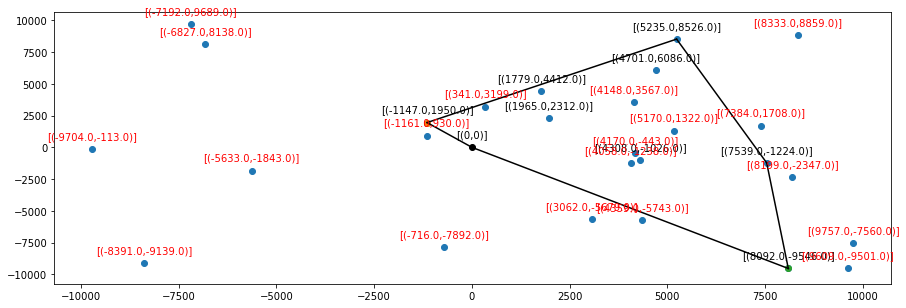

In [3690]:
plotGraph(coordinates, numbToys, simplices, toysCoordsViz, minToysExtremun, maxToysExtremun)

In [3691]:
numVexticesMin = len(pathMin)
numVexticesMax = len(pathMax)
adjMatrixMax = np.zeros((numVexticesMin, numVexticesMin))
adjMatrixMin = np.zeros((numVexticesMax, numVexticesMax))
print("numVexticesMin : ", numVexticesMin)
print("numVexticesMax : ", numVexticesMax)

numVexticesMin :  7
numVexticesMax :  7


In [3692]:
print(adjMatrixMax)
print()
for i in range(numVexticesMax) :
    for j in range(numVexticesMax) :
        if i != j :
            adjMatrixMax[i,j] = distance(pathMax[i], pathMax[j])
            adjMatrixMax[j,i]  = adjMatrixMax[i,j]
            
            adjMatrixMin[i,j] = distance(pathMin[i], pathMin[j])
            adjMatrixMin[j,i]  = adjMatrixMin[i,j]
            
adjMatrixMax[0,numVexticesMax-1] = 0
adjMatrixMax[:,0] = 0
adjMatrixMax[numVexticesMax-1,:] = 0

adjMatrixMin[0,numVexticesMin-1] = 0
adjMatrixMin[:,0] = 0
adjMatrixMin[numVexticesMin-1,:] = 0

print("MaxGraph :")
print(adjMatrixMax)
print("MinGraph :")
print(adjMatrixMin)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

MaxGraph :
[[    0.          4193.46503503  3217.12324912  5336.34556602
   4242.64162993  5470.77627033     0.        ]
 [    0.             0.          5284.44935637  2028.60173519
    802.85054649  4010.06034867  9911.94698331]
 [    0.          5284.44935637     0.          5180.96226583
   5788.18261633  3824.74482809 14916.8705163 ]
 [    0.          2028.60173519  5180.96226583     0.
   2791.08294395  2466.67975222 11253.95521583]
 [    0.           802.85054649  5788.18261633  2791.08294395
      0.          4805.84279809  9235.5844428 ]
 [    0.          4010.06034867  3824.74482809  2466.67975222
   4805.84279809     0.         13693.27955605]
 [    0.             0.             0.             0.
      0.             0.             0.        ]]
MinGraph :
[[   0.         4193.46503503 3217.12324912 5336.3455

edges :  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6)]


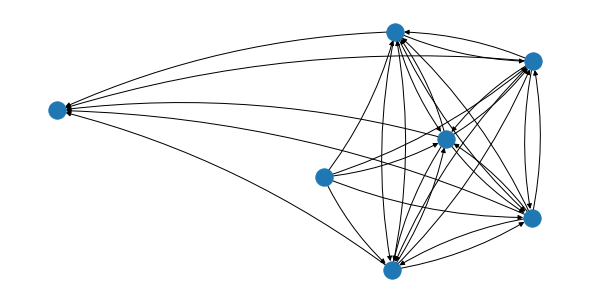

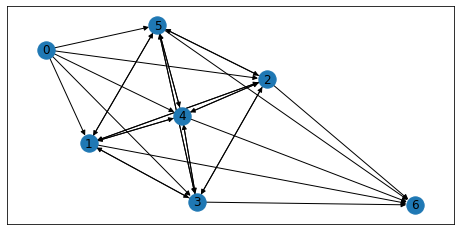

In [3693]:
edges, adjMap = getEdges(adjMatrixMax)
G1 = nx.DiGraph()
G = nx.MultiDiGraph()
G.add_edges_from(edges) 
G1.add_edges_from(edges) 

plt.figure(figsize=(8,4))
nx.draw(G, connectionstyle='arc3, rad = 0.1',with_label = True)
plt.figure(figsize=(8,4))
nx.draw_networkx(G1, with_label = True)

edges :  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6)]


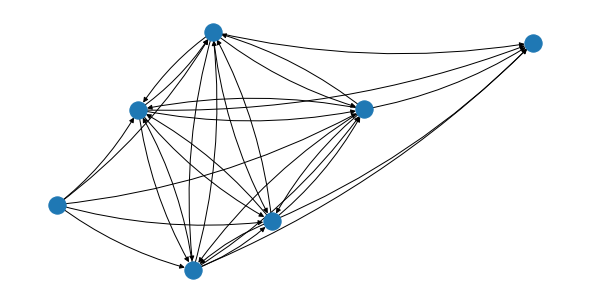

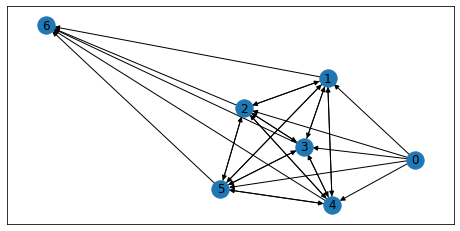

In [3694]:
edges, adjMap = getEdges(adjMatrixMin)
G1 = nx.DiGraph()
G = nx.MultiDiGraph()
G.add_edges_from(edges) 
G1.add_edges_from(edges) 

plt.figure(figsize=(8,4))
nx.draw(G, connectionstyle='arc3, rad = 0.1',with_label = True)
plt.figure(figsize=(8,4))
nx.draw_networkx(G1, with_label = True)

In [3695]:
adjMatrixMax

array([[    0.        ,  4193.46503503,  3217.12324912,  5336.34556602,
         4242.64162993,  5470.77627033,     0.        ],
       [    0.        ,     0.        ,  5284.44935637,  2028.60173519,
          802.85054649,  4010.06034867,  9911.94698331],
       [    0.        ,  5284.44935637,     0.        ,  5180.96226583,
         5788.18261633,  3824.74482809, 14916.8705163 ],
       [    0.        ,  2028.60173519,  5180.96226583,     0.        ,
         2791.08294395,  2466.67975222, 11253.95521583],
       [    0.        ,   802.85054649,  5788.18261633,  2791.08294395,
            0.        ,  4805.84279809,  9235.5844428 ],
       [    0.        ,  4010.06034867,  3824.74482809,  2466.67975222,
         4805.84279809,     0.        , 13693.27955605],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ]])

In [3696]:
adjMatrixMin

array([[   0.        , 4193.46503503, 3217.12324912, 5336.34556602,
        4242.64162993, 5470.77627033,    0.        ],
       [   0.        ,    0.        , 5284.44935637, 2028.60173519,
         802.85054649, 4010.06034867, 5830.6893246 ],
       [   0.        , 5284.44935637,    0.        , 5180.96226583,
        5788.18261633, 3824.74482809, 1942.71588247],
       [   0.        , 2028.60173519, 5180.96226583,    0.        ,
        2791.08294395, 2466.67975222, 6348.13933369],
       [   0.        ,  802.85054649, 5788.18261633, 2791.08294395,
           0.        , 4805.84279809, 6103.71763764],
       [   0.        , 4010.06034867, 3824.74482809, 2466.67975222,
        4805.84279809,    0.        , 5536.39901019],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [3697]:
g = Graph(adjMatrixMax.shape[0]) 
g.graph = adjMatrixMax 
prev = g.dijkstra(0)
seq = finPath(prev, numVexticesMax-1)
#length = pathLength(seq, dataArray)
print("length(prev) : ", len(prev))
print(prev)
print("Path: ", seq)
#print("PAth Length: ", length)

length(prev) :  7
[None, 0, 0, 0, 0, 0, 4]
Path:  [0, 4, 6]


In [3698]:
g = GraphLongestDistance(adjMatrixMin.shape[0]) 
g.graph = adjMatrixMin 
g.findLongestDistance(0)
#---------------------------------------------------------

minPathLength = distance([0,0], maxToysExtremun)
pathX1 = pathLength(seq, adjMatrixMax)
pathX2 = g.getDistByIndex(numVexticesMin - 1 )
alt1 = max(minPathLength, pathX1)
alt2 = min(minPathLength, pathX2)
#max(alt1, alt2)

print("pathX1 : ", pathX1)
print("pathX2 : ", pathX2)
print("minPathLength : ", minPathLength)
print("alt1 : ", alt1)
print("alt1 : ", alt2)
print("max(alt1, alt2) : ", max(alt1, alt2))
print("min(alt1, alt2) : ", min(alt1, alt2))

finalPathLength = minPathLength
if len(TreesInside) == 0 :
    finalPathLength = minPathLength
else :
    if abs(len(ToysExtremun) - len(TreesInside)) < 2 :
        # Pessimist view
        finalPathLength = max(pathX1 , max(minPathLength, pathX2))
    else :
        # Optimist view
        finalPathLength = min(pathX1 , max(minPathLength, pathX2)) 
    
print("------------------------------- ************** -----------------------------------")
print("Final Path Length : ", finalPathLength)

pathX1 :  13478.226072723384
pathX2 :  27792.201409458736
minPathLength :  12514.255071717214
alt1 :  13478.226072723384
alt1 :  12514.255071717214
max(alt1, alt2) :  13478.226072723384
min(alt1, alt2) :  12514.255071717214
------------------------------- ************** -----------------------------------
Final Path Length :  27792.201409458736


In [3699]:
#g = GraphLongestDistance(adjMatrixMax.shape[0]) 
#g.graph = adjMatrixMax 
#g.findLongestDistance(0)
#g.getDistByIndex(numVexticesMax - 1 )

In [ ]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################